# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow==2.7.1 tensorflow-gpu==2.7.1 opencv-python mediapipe sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [10]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
draw_landmarks(frame, results)

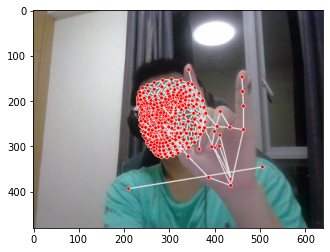

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [17]:
result_test = extract_keypoints(results)

In [18]:
len(result_test)

1662

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.46360976,  0.55745411, -0.82151937, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['Hi', 'I am', 'From', 'Singapore', 'Paiseh', 'I', 'Cannot', 'Speak', 'But', 'Machine', 'Learning', 'Can', 'Help', 'Translate'])

# Thirty videos worth of data
no_sequences = 50

start = 0  # Change to you start number

# Videos are going to be 30 frames in length
sequence_length = 30

In [20]:
for action in actions: 
    #dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map

{'Hi': 0,
 'I am': 1,
 'From': 2,
 'Singapore': 3,
 'Paiseh': 4,
 'I': 5,
 'Cannot': 6,
 'Speak': 7,
 'But': 8,
 'Machine': 9,
 'Learning': 10,
 'Can': 11,
 'Help': 12,
 'Translate': 13}

In [23]:
sequences, labels = [], []
for action in actions:
    for sequence in range(start, start+no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(700, 30, 1662)

In [25]:
np.array(labels).shape

(700,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(700, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [29]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
y_test.shape

(175, 14)

# 7. Build and Train LSTM Neural Network

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["categorical_accuracy"])

# Start training the model.
LSTM_model_training_history = model.fit(x = X_train, y = y_train, epochs = 500, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/500
105/105 [==============================] - 9s 65ms/step - loss: 2.7479 - categorical_accuracy: 0.0714 - val_loss: 2.6550 - val_categorical_accuracy: 0.0571
Epoch 2/500
105/105 [==============================] - 6s 56ms/step - loss: 2.6169 - categorical_accuracy: 0.1214 - val_loss: 2.5521 - val_categorical_accuracy: 0.0762
Epoch 3/500
105/105 [==============================] - 7s 70ms/step - loss: 2.6059 - categorical_accuracy: 0.0976 - val_loss: 2.6210 - val_categorical_accuracy: 0.0667
Epoch 4/500
105/105 [==============================] - 6s 55ms/step - loss: 2.6678 - categorical_accuracy: 0.0905 - val_loss: 2.6540 - val_categorical_accuracy: 0.0381
Epoch 5/500
105/105 [==============================] - 6s 53ms/step - loss: 2.6329 - categorical_accuracy: 0.0881 - val_loss: 2.6645 - val_categorical_accuracy: 0.0381
Epoch 6/500
 57/105 [===============>..............] - ETA: 2s - loss: 2.6049 - categorical_accuracy: 0.0789

KeyboardInterrupt: 

In [35]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
LSTM_model_training_history = model.fit(X_train, y_train, epochs = 500, batch_size = 4 ,
                                             shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/500
105/105 [==============================] - 9s 64ms/step - loss: 3.9591 - categorical_accuracy: 0.0452 - val_loss: 2.9341 - val_categorical_accuracy: 0.0571
Epoch 2/500
105/105 [==============================] - 6s 55ms/step - loss: 2.7389 - categorical_accuracy: 0.0690 - val_loss: 2.6439 - val_categorical_accuracy: 0.0762
Epoch 3/500
105/105 [==============================] - 6s 54ms/step - loss: 2.6396 - categorical_accuracy: 0.0714 - val_loss: 2.6517 - val_categorical_accuracy: 0.0762
Epoch 4/500
105/105 [==============================] - 5s 51ms/step - loss: 2.6355 - categorical_accuracy: 0.0833 - val_loss: 2.6512 - val_categorical_accuracy: 0.0667
Epoch 5/500
105/105 [==============================] - 6s 53ms/step - loss: 2.6361 - categorical_accuracy: 0.0857 - val_loss: 2.6483 - val_categorical_accuracy: 0.0476
Epoch 6/500
105/105 [==============================] - 5s 50ms/step - loss: 2.6666 - categorical_accuracy: 0.0714 - val_loss: 2.7085 - val_categorical_accuracy:

105/105 [==============================] - 5s 49ms/step - loss: 1.9390 - categorical_accuracy: 0.2333 - val_loss: 1.9429 - val_categorical_accuracy: 0.1810
Epoch 50/500
105/105 [==============================] - 6s 54ms/step - loss: 1.8692 - categorical_accuracy: 0.2667 - val_loss: 1.9079 - val_categorical_accuracy: 0.1810
Epoch 51/500
105/105 [==============================] - 6s 62ms/step - loss: 3.1254 - categorical_accuracy: 0.2405 - val_loss: 1.9103 - val_categorical_accuracy: 0.2190
Epoch 52/500
105/105 [==============================] - 6s 56ms/step - loss: 1.8598 - categorical_accuracy: 0.2690 - val_loss: 2.0439 - val_categorical_accuracy: 0.2286
Epoch 53/500
105/105 [==============================] - 7s 65ms/step - loss: 1.8009 - categorical_accuracy: 0.2881 - val_loss: 1.8383 - val_categorical_accuracy: 0.2095
Epoch 54/500
105/105 [==============================] - 8s 80ms/step - loss: 1.8388 - categorical_accuracy: 0.2833 - val_loss: 1.8577 - val_categorical_accuracy: 0.2476

In [36]:
model.fit(X_train, y_train, epochs=1000, validation_split = 0.2, callbacks=[tb_callback])

Epoch 1/1000
14/14 [==============================] - 4s 156ms/step - loss: 13.4499 - categorical_accuracy: 0.0524 - val_loss: 2.7276 - val_categorical_accuracy: 0.1143
Epoch 2/1000
14/14 [==============================] - 2s 128ms/step - loss: 2.7434 - categorical_accuracy: 0.0976 - val_loss: 2.7566 - val_categorical_accuracy: 0.1048
Epoch 3/1000
14/14 [==============================] - 2s 143ms/step - loss: 2.6023 - categorical_accuracy: 0.1452 - val_loss: 2.5554 - val_categorical_accuracy: 0.1048
Epoch 4/1000
14/14 [==============================] - 2s 124ms/step - loss: 2.6293 - categorical_accuracy: 0.0762 - val_loss: 2.5415 - val_categorical_accuracy: 0.0952
Epoch 5/1000
14/14 [==============================] - 2s 135ms/step - loss: 2.5071 - categorical_accuracy: 0.1286 - val_loss: 2.5073 - val_categorical_accuracy: 0.0667
Epoch 6/1000
14/14 [==============================] - 2s 156ms/step - loss: 2.3203 - categorical_accuracy: 0.1714 - val_loss: 2.5010 - val_categorical_accuracy

14/14 [==============================] - 2s 136ms/step - loss: 1.8319 - categorical_accuracy: 0.2500 - val_loss: 1.7342 - val_categorical_accuracy: 0.2952
Epoch 50/1000
14/14 [==============================] - 2s 117ms/step - loss: 1.7499 - categorical_accuracy: 0.2690 - val_loss: 1.7872 - val_categorical_accuracy: 0.2190
Epoch 51/1000
14/14 [==============================] - 2s 112ms/step - loss: 1.6905 - categorical_accuracy: 0.2810 - val_loss: 1.7105 - val_categorical_accuracy: 0.2286
Epoch 52/1000
14/14 [==============================] - 2s 109ms/step - loss: 1.7677 - categorical_accuracy: 0.2667 - val_loss: 1.6617 - val_categorical_accuracy: 0.2571
Epoch 53/1000
14/14 [==============================] - 2s 112ms/step - loss: 1.7191 - categorical_accuracy: 0.2476 - val_loss: 1.8595 - val_categorical_accuracy: 0.2190
Epoch 54/1000
14/14 [==============================] - 2s 112ms/step - loss: 1.8448 - categorical_accuracy: 0.2667 - val_loss: 1.7904 - val_categorical_accuracy: 0.1714


14/14 [==============================] - 1s 100ms/step - loss: 2.6398 - categorical_accuracy: 0.0738 - val_loss: 2.6480 - val_categorical_accuracy: 0.0381
Epoch 98/1000
14/14 [==============================] - 1s 97ms/step - loss: 2.6397 - categorical_accuracy: 0.0738 - val_loss: 2.6482 - val_categorical_accuracy: 0.0381
Epoch 99/1000
14/14 [==============================] - 2s 111ms/step - loss: 2.6396 - categorical_accuracy: 0.0738 - val_loss: 2.6482 - val_categorical_accuracy: 0.0381
Epoch 100/1000
14/14 [==============================] - 2s 122ms/step - loss: 2.6395 - categorical_accuracy: 0.0738 - val_loss: 2.6483 - val_categorical_accuracy: 0.0381
Epoch 101/1000
14/14 [==============================] - 2s 118ms/step - loss: 2.6394 - categorical_accuracy: 0.0738 - val_loss: 2.6485 - val_categorical_accuracy: 0.0381
Epoch 102/1000
14/14 [==============================] - 2s 114ms/step - loss: 2.6393 - categorical_accuracy: 0.0738 - val_loss: 2.6485 - val_categorical_accuracy: 0.038

KeyboardInterrupt: 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 14)                462       
                                                                 
Total params: 597,038
Trainable params: 597,038
Non-trai

# 8. Make Predictions

In [27]:
res = model.predict(X_test)

In [28]:
actions[np.argmax(res[4])]

'Paiseh'

In [29]:
actions[np.argmax(y_test[4])]

'Paiseh'

# 9. Save Weights

In [30]:
model.save('action.h5')

In [40]:
del model

In [43]:
model.load_weights('lstm.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_test)

In [46]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[162,   0],
        [ 13,   0]],

       [[163,   0],
        [ 12,   0]],

       [[162,   0],
        [ 13,   0]],

       [[160,   1],
        [ 14,   0]],

       [[165,   0],
        [ 10,   0]],

       [[121,  42],
        [  8,   4]],

       [[166,   0],
        [  9,   0]],

       [[152,  12],
        [ 11,   0]],

       [[164,   1],
        [ 10,   0]],

       [[155,   4],
        [ 16,   0]],

       [[150,  10],
        [ 15,   0]],

       [[ 74,  93],
        [  3,   5]],

       [[155,   3],
        [ 17,   0]],

       [[160,   0],
        [ 15,   0]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

0.05142857142857143

# 11. Test in Real Time

In [36]:
from scipy import stats

In [37]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [39]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

NameError: name 'image' is not defined

<Figure size 1296x1296 with 0 Axes>

In [38]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti